---
title: "Noisy channel coding"
author: "Vannsh Jani"
date: "10/31/2023"
categories: [Information Theory,ML]
jupyter: python3
---

## What is Noisy channel coding?

Let's say we have a binary sting with 4 bits as $\textbf{1010}$. When we transmit this message and it is recieved by the reciever, the probability that the bit has changed it's value or P(Bit error) = 0.2. Hence, the message or string recieved will have about 20% of it's bits different then the original message.

One of the solutions to reduce the Bit probability error is to encode the binary string such that transmitting the encoded message reduces the Bit probability error, transmit the encoded message and the reciever can decode the string to recieve the original message with lesser bit probability error. Following is an example of one such coding strategy.

## $\text{R}_\text n$ coding strategy

In this strategy, we repeat each bit in the original binary message n times and transmit that message. While decoding the message, we pick the most frequent bit in the subsequent n-sized subset as the output bit. Here we take n as an odd integer for obvious reasons.

In the above example, our bit string is $\textbf{1010}$. If we use the $\text R_\text 3$, the encoded message is $\textbf{111000111000}$.

After transmitting the message, the binary message could be $\text{1{\color{red}0}1000{\color{red}0}1100{\color{red}1}}$.

If we choose the bit with maximum freuqency in each 3-sized subset we get,

$$ 
\begin{aligned} \text{1{\color{red}0}1} &\Rightarrow \text{1} \\ \text{000} &\Rightarrow \text{0} \\ \text{{\color{red}0}11} &\Rightarrow \text{1} \\ \text{00{\color{red}1}} &\Rightarrow \text{0} \end{aligned}
$$

Hence, the decode string is $\text{1010}$ which is the same as the original string despite of some errors during transmission. Such a strategy reduces the bit probability error.

In the above example, if we consider a 3-sized subset. The bit is flipped or gives an error after transmission if 2 or more bits are flipped. Hence, the bit probability error for this case can be calculated as follows.

P(2 bits flipped) = $3 \hspace{0.05cm} \text x \hspace{0.05cm} \text p^2 \hspace{0.05cm} \text x \hspace{0.05cm}\text{(1-p)}$. Here $\text{p}$ is the bit probability error (0.2 in the above example).

P(3 bits flipped) = $\text p^3$.

The new bit probability error is P(2 bits flipped) + P(3 bits flipped). Calculating with $\text p=0.2$. The new bit probability error is $\textbf{0.104}$ which is less than 0.2.

## Limitations

Even though the bit probability error is reduced, it could still be significant. There could still be two bits or more flipped in a 3-sized subset in the above example. Increasing the number n will reduce the bit probability error but in doing so we slow down the message. If we define rate as $\text{rate}=\hspace{0.1cm}\frac{\text{length of original string}}{\text{length  of encoded string}}$. On increasing n, the length of the encoded string increases and so the rate decreases and the message takes more time for transmission.

Following is a plot of n vs bit probability error.

In [80]:
from math import factorial as f

def nck(n,k):
    if (n<k):
        return
    return f(n)/(f(k)*f(n-k))

# n is number of repeatations of each bit
# p is bit probability error when n=1
def bit_probability_error(n,p):
    min_bits = (n+1)//2
    prob_sum = 0
    for bits in range(min_bits,n+1):
        n_choose_k = nck(n,bits)
        prob_sum += n_choose_k * (p**bits) * ((1-p)**(n-bits))
    return prob_sum

rounded_off_error = round(bit_probability_error(3,0.2),3)
print(f"Reduced bit probability error is {rounded_off_error}")

Reduced bit probability error is 0.104


In [81]:
import numpy as np
import matplotlib.pyplot as plt

n_range = np.arange(1,22,2)
rate = 1/n_range
n_range,rate

(array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21]),
 array([1.        , 0.33333333, 0.2       , 0.14285714, 0.11111111,
        0.09090909, 0.07692308, 0.06666667, 0.05882353, 0.05263158,
        0.04761905]))

In [82]:
reduced_probability = [bit_probability_error(i,0.2) for i in n_range]
reduced_probability = np.array(reduced_probability)
reduced_probability

array([0.2       , 0.104     , 0.05792   , 0.033344  , 0.01958144,
       0.01165421, 0.00700356, 0.00423975, 0.00258146, 0.00157912,
       0.0009697 ])

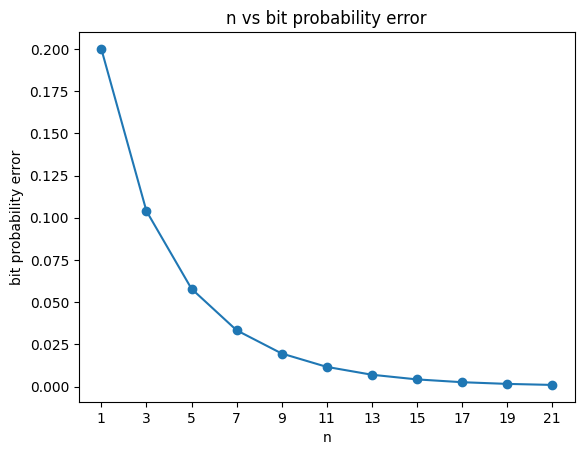

In [83]:
plt.plot(n_range,reduced_probability,marker='o')
plt.title("n vs bit probability error")
plt.xlabel("n")
plt.xticks(n_range)
plt.ylabel("bit probability error")
plt.show()

Let's also plot rate vs bit probability error

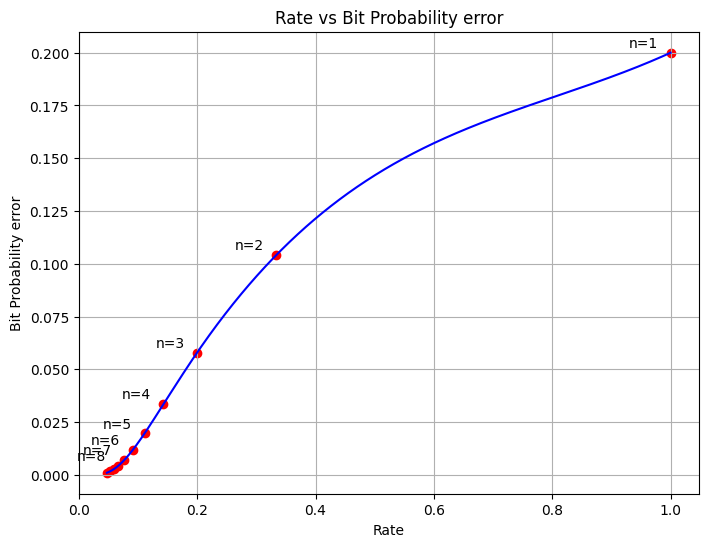

In [100]:
from scipy.interpolate import interp1d

interp = interp1d(rate, reduced_probability, kind='cubic')
fine_rate = np.linspace(rate.min(), rate.max(), 5000)
smooth_reduced_probability = interp(fine_rate)
plt.figure(figsize=(8, 6))
plt.plot(fine_rate, smooth_reduced_probability, color='b')
plt.scatter(rate, reduced_probability, color='r',  marker='o')
for i in range(8):
    plt.annotate(f"n={i+1}",(rate[i],reduced_probability[i]),textcoords="offset points",xytext=(-30,4),ha="left")
plt.xlabel('Rate')
plt.ylabel('Bit Probability error')
plt.title('Rate vs Bit Probability error')
plt.grid(True)
plt.show()


This is possibly how Bit probability error varies with rate.

We want to figure out the regions in the plot of rate vs bit probability error which can be achievable. Famous computer scientist Claude Shannon discovered which regions in the above plot are achieveable, that it is possible to achieve atmost a rate C (channel capacity) given non-zero bit probability error where C is given as follows

$$
\begin{aligned}\text C &= \hspace{0.1cm}1-(\text p\log_2\frac{1}{\text p} + (1-\text p)\log_2\frac{1}{1-\text p}) \\
\text C &= \hspace{0.1cm} 1-\text H(\text X)
\end{aligned}
$$

Here $\textbf H$ is the entropy function. $\text p$ is the non-zero bit probability error. $\textbf X$ is the following random variable

$$
\text X = \hspace{0.1cm}
\begin{cases}
0\hspace{0.1cm}\text{with prob p} \\
1\hspace{0.1cm}\text{with prob 1-p}
\end{cases}
$$

Following is the plot for the same.

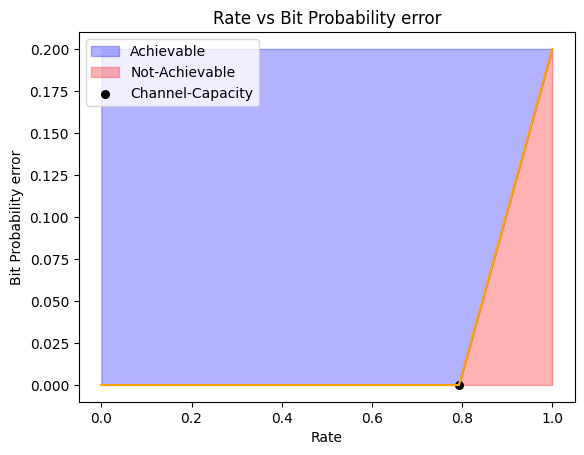

In [156]:
def channel_capacity(p):
    return 1 - (p*np.log2(1/p) + (1-p)*np.log2(1/1-p))

def f1(p,c):
    x = np.linspace(c,1.0,10)
    m = p/(1-c)
    return m*(x-c)
    

def plot_achievable(c,p):
    x1 = np.linspace(c,1.0,10)
    x2 = np.linspace(0,c,10)
    y1 = f1(0.2,c)
    y2 = np.zeros(x2.shape)
    plt.plot(x2,y2,color="orange")
    plt.plot(x1,y1,color="orange")
    plt.xlabel("Rate")
    plt.ylabel("Bit Probability error")
    plt.title('Rate vs Bit Probability error')
    x = np.concatenate((x2,x1))
    y = np.concatenate((y2,y1))
    plt.fill_between(x, y, max(y), where=(y <= max(y)), color='blue', alpha=0.3,label="Achievable")
    plt.fill_between(x1, y1, color='red', alpha=0.3, label="Not-Achievable")
    plt.scatter(c, 0, color='black', label='Channel-Capacity',s=30)
    plt.legend()
    plt.show()
c = channel_capacity(0.2)
plot_achievable(c,0.2)

Hence, as long as we have a non-zero bit probability error no matter how arbitrarily small it is, we can achieve a rate upto Channel-Capacity. Although Shannon discovered that such a rate is possible, but he didn't tell which encoding strategy from all possible can achieve this. You can further change the parameter values in the following streamlit application.


<https://noisychannelcoding.streamlit.app/>